# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
687,1,107,50,19,0,28.3,0.181,29,0
171,6,134,70,23,130,35.4,0.542,29,1
13,1,189,60,23,846,30.1,0.398,59,1
555,7,124,70,33,215,25.5,0.161,37,0
285,7,136,74,26,135,26.0,0.647,51,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

# y_pred_class_nn = model.predict(X_test_norm)
y_pred_prob_nn = model.predict(X_test_norm)
y_pred_class_nn = np.argmax(y_pred_prob_nn,axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn[:10]

array([[0.3681141 ],
       [0.67222965],
       [0.2520613 ],
       [0.17414598],
       [0.17219631],
       [0.44186217],
       [0.02469936],
       [0.20824383],
       [0.93386495],
       [0.17118852]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

roc-auc is 0.822


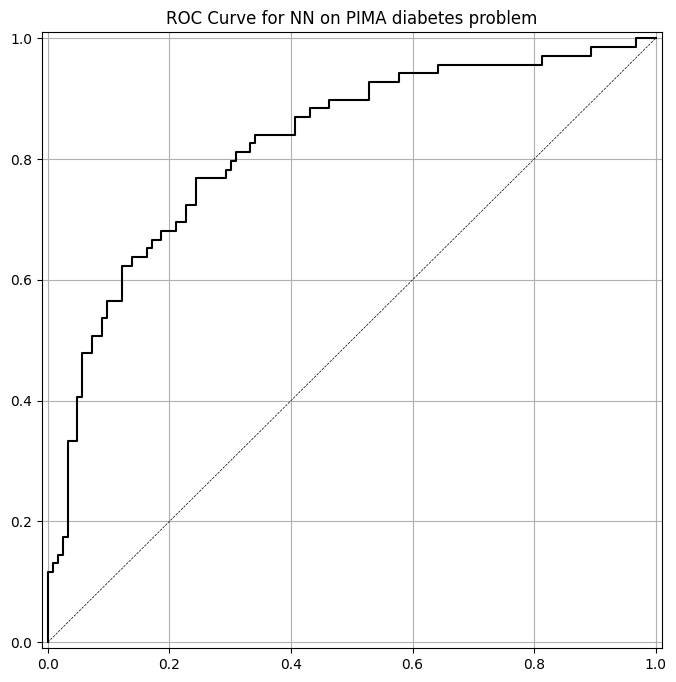

In [ ]:
# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

plot_roc(y_test, y_pred_prob_nn, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

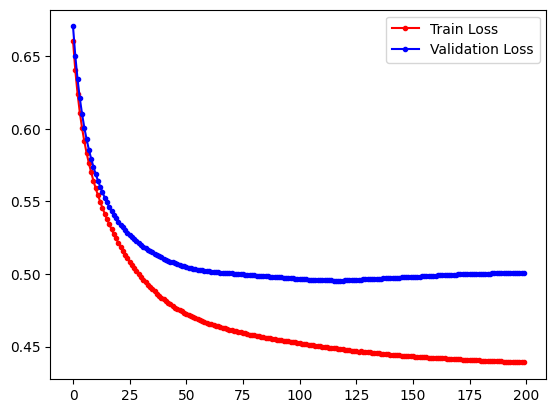

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> The model seems to be underfitting since both the train and validation loss are still relatively high. There is also a sizeable difference between the two, with the train loss being lower.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# Build a model with two hidden layers, each with 6 nodes
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu", name='HiddenLayer_1'),
    Dense(6, activation="relu", name='HiddenLayer_2'),
    Dense(1, activation="sigmoid", name='FinalLayer')
])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 6)                 54        
                                                                 
 HiddenLayer_2 (Dense)       (None, 6)                 42        
                                                                 
 FinalLayer (Dense)          (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Use a learning rate of .003 and train for 1500 epochs

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

In [ ]:
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = np.argmax(y_pred_prob_nn_2, axis=1)

6/6 [==============================] - 0s 2ms/step


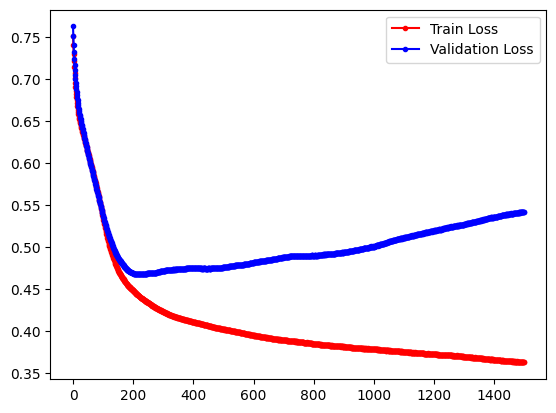

In [ ]:
# Graph the trajectory of the loss functions, accuracy on both train and test set

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

roc-auc is 0.827


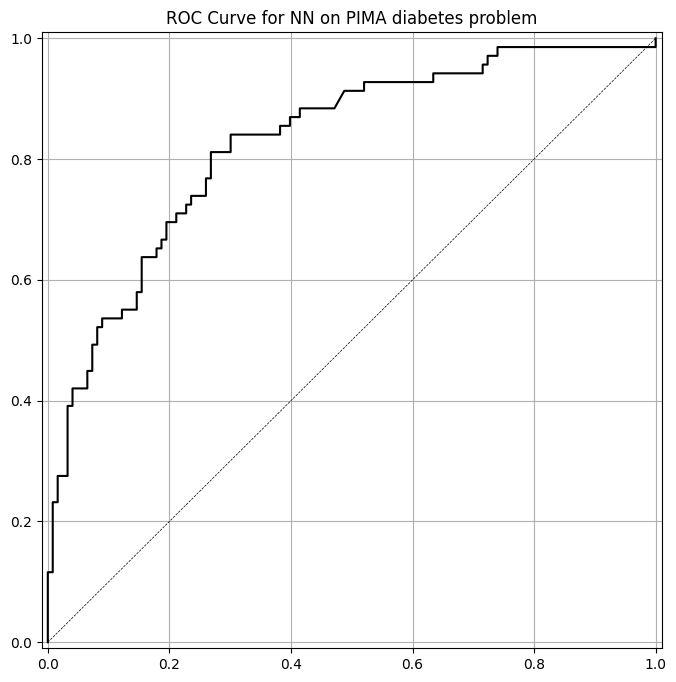

In [ ]:
# Plot the roc curve for the predictions

print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

In [ ]:
# Use different learning rates, numbers of epochs, and network structures.

learning_rates = [.003, .001]
epochs = [200, 700, 1500]
nodes = [3, 6, 12]
hidden_layers = [1, 2]

results={}
for lr in learning_rates:
  for epoch in epochs:
    for node in nodes:
      for hidden_layer in hidden_layers:
        model = Sequential()
        # First layer; input layer
        model.add(Dense(node, input_shape=(8,), activation='relu'))

        # Add hidden layers
        i = 1
        while i < hidden_layer:
          model.add(Dense(node, activation='relu'))
          i += 1

        # Final layer
        model.add(Dense(1, activation='sigmoid'))

        model.compile(SGD(lr=lr), "binary_crossentropy", metrics=["accuracy"])
        run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=epoch)

        results[(lr, epoch, node, hidden_layer)] = {
            'history': run_hist.history,
            'val_loss': min(run_hist.history['val_loss'])  # Use the minimum validation loss as the performance metric
        }

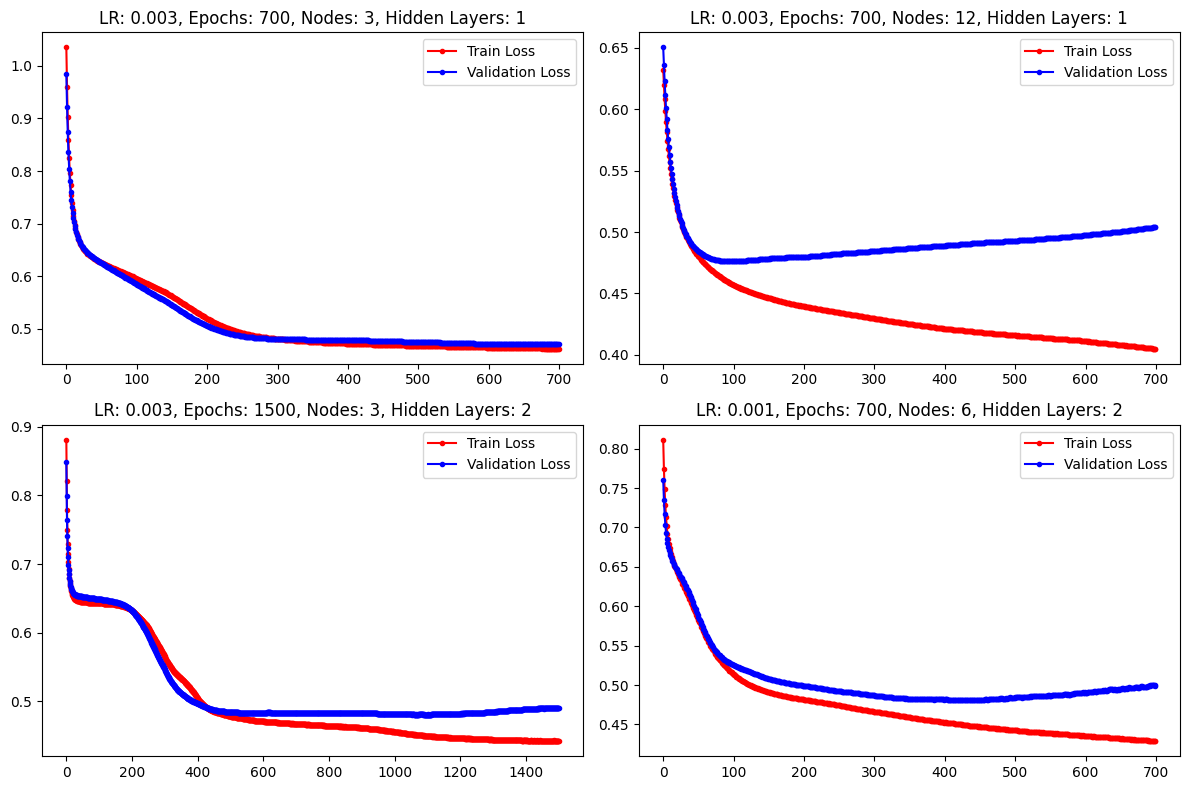

In [ ]:
# Plot the results of training and validation loss using different learning rates, number of epocgs and network structures

# Sort the models
sorted_models = sorted(results.items(), key=lambda x: x[1]['val_loss'])[:4]

# Plot top 4 models on subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (params, result) in enumerate(sorted_models):
    row = i // 2
    col = i % 2

    ax[row, col].plot(result['history']["loss"],'r', marker='.', label="Train Loss")
    ax[row, col].plot(result['history']["val_loss"],'b', marker='.', label="Validation Loss")
    ax[row, col].set_title(f'LR: {params[0]}, Epochs: {params[1]}, Nodes: {params[2]}, Hidden Layers: {params[3]}')
    ax[row, col].legend()

plt.tight_layout()
plt.show()

* Interpret your result

> The loop tested 36 different models with varying structures, but for the sake of simplicity, I only printed the top 4 performing models.

> From the range I tested, `0.003` learning rate seems to be more ideal, indicating that a lower LR does little to increase the model's performance. `700` epochs, being the middle range, is the best option. And `1` hidden layer with `3` nodes is the top network structure.

> However, it seems that even the best perforing model is still underfitting, with its validation loss closer to 0.5, similar to random guessing. But the gap between the train and validation sets are much closer.

#### Conclusion

> In conclusion, the exploration of different learning rates, epochs, and network structures for diabetes prediction has provided valuable insights into the behavior of neural networks. I observed that variations in these parameters can significantly impact training and validation outcomes.